# Movie Rating Prediction

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv("IMDb Movies India.csv",encoding="latin-1")

In [3]:
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
7,.in for Motion,(2008),59 min,Documentary,NaN,NaN,Anirban Datta,NaN,NaN,NaN
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,(2014),116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


In [5]:
df.shape

(15509, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [7]:
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


## Data Cleaning

In [8]:
# check missing value or NULL values
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [9]:
df.dropna(subset=["Rating"], inplace = True)

In [11]:
df.dropna(subset=['Actor 1','Actor 2','Actor 3','Director','Genre'],inplace=True)

In [12]:
df.isnull().sum()

Name           0
Year           0
Duration    1899
Genre          0
Rating         0
Votes          0
Director       0
Actor 1        0
Actor 2        0
Actor 3        0
dtype: int64

In [13]:
df.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,(2014),116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon
10,1:1.6 An Ode to Lost Love,(2004),96 min,Drama,6.2,17,Madhu Ambat,Rati Agnihotri,Gulshan Grover,Atul Kulkarni
11,1:13:7 Ek Tera Saath,(2016),120 min,Horror,5.9,59,Arshad Siddiqui,Pankaj Berry,Anubhav Dhir,Hritu Dudani
12,100 Days,(1991),161 min,"Horror, Romance, Thriller",6.5,983,Partho Ghosh,Jackie Shroff,Madhuri Dixit,Javed Jaffrey
13,100% Love,(2012),166 min,"Comedy, Drama, Romance",5.7,512,Rabi Kinagi,Jeet,Koyel Mallick,Sujoy Ghosh


### convert votes to integer and remove commas and convert year (2019) to 2019 and remove min from duration columns

In [14]:
# convert duration columns
df['Duration'] = df['Duration'].str.strip('min')
# convert votes columns
df['Votes'] = df['Votes'].str.replace(',','').astype(int)
     

In [15]:
# convert year columns
df['Year'] = df['Year'].str.strip('()').astype(int)

In [16]:
df['Duration'].fillna(df['Duration'].median(),inplace=True)

In [17]:
df.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7558 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      7558 non-null   object 
 1   Year      7558 non-null   int32  
 2   Duration  7558 non-null   object 
 3   Genre     7558 non-null   object 
 4   Rating    7558 non-null   float64
 5   Votes     7558 non-null   int32  
 6   Director  7558 non-null   object 
 7   Actor 1   7558 non-null   object 
 8   Actor 2   7558 non-null   object 
 9   Actor 3   7558 non-null   object 
dtypes: float64(1), int32(2), object(7)
memory usage: 590.5+ KB


In [19]:
df.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,2014,116,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon
10,1:1.6 An Ode to Lost Love,2004,96,Drama,6.2,17,Madhu Ambat,Rati Agnihotri,Gulshan Grover,Atul Kulkarni
11,1:13:7 Ek Tera Saath,2016,120,Horror,5.9,59,Arshad Siddiqui,Pankaj Berry,Anubhav Dhir,Hritu Dudani
12,100 Days,1991,161,"Horror, Romance, Thriller",6.5,983,Partho Ghosh,Jackie Shroff,Madhuri Dixit,Javed Jaffrey
13,100% Love,2012,166,"Comedy, Drama, Romance",5.7,512,Rabi Kinagi,Jeet,Koyel Mallick,Sujoy Ghosh


#### Now data are clean and inputed.

## EDA(Exploratory Data Analysis)

#### Top 10 Movies

In [20]:
# find top 10 movies based on rating
top_movie = df.loc[df['Rating'].sort_values(ascending=False)[:10].index]
top_movie

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
8339,Love Qubool Hai,2020,94,"Drama, Romance",10.0,5,Saif Ali Sayeed,Ahaan Jha,Mahesh Narayan,Rajasree Rajakumari
5410,Half Songs,2021,79,"Music, Romance",9.7,7,Sriram Raja,Raj Banerjee,Emon Chatterjee,Purshottam Mulani
2563,Breed,2020,135.0,Drama,9.6,48,Bobby Kumar,Bobby Kumar,Ashfaq,Fasih Choudhry
14222,The Reluctant Crime,2020,113,Drama,9.4,16,Arvind Pratap,Dharmendra Ahir,Awanish Kotnal,Rakhi Mansha
5077,Gho Gho Rani,2019,105,"History, Romance",9.4,47,Munni Pankaj,Nishi Neha Mishra,Pankaj Kamal,Akash Kumar
6852,June,2021,93,Drama,9.4,18,Suhrud Godbole,Vaibhav Khisti,Nilesh Divekar,Jitendra Joshi
12673,Secrets of Sinauli,2021,56,"Documentary, History",9.3,1373,Raghav Jairath,Manoj Bajpayee,R.S. Bhist,K.N. Dixit
5125,God of gods,2019,90,Documentary,9.3,46,Venkatesh Bk,Tejaswini Manogna,Triyug Mantri,Raj Singh Verma
8344,Love Sorries,2021,101,"Comedy, Drama, Romance",9.3,79,Gautam Joshi,Prashant Chaubey,Puneet Chouksey,Amitabh Gupta
1314,Ashok Vatika,2018,97,Drama,9.3,7,Rahul Mallick,Kunj Anand,Sanjay Bishnoi,Paras Zutshi


### Distribution of Top 10 movies wrt Year

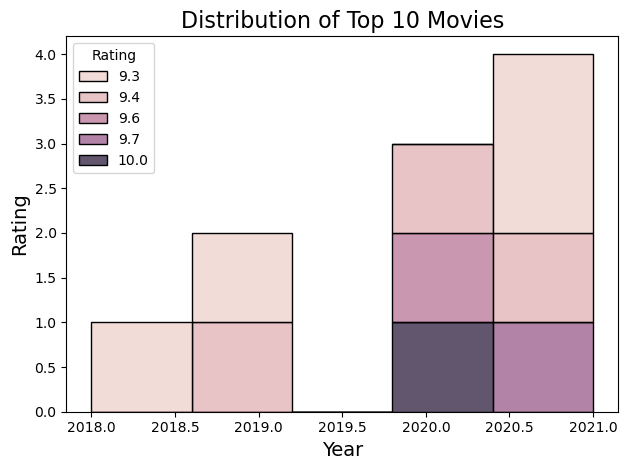

In [21]:
sns.histplot(data=top_movie, x="Year",hue="Rating", multiple="stack")
plt.title('Distribution of Top 10 Movies', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Rating', fontsize=14)
plt.tight_layout()
plt.show()

### Distribution of Genre of movies

In [22]:
genre_counts = df['Genre'].value_counts().reset_index()
genre_counts.columns = ['Genre', 'Count']

# Select the top N genres (e.g., top 10)
top_n_genres = genre_counts.head(10)
top_n_genres

,Genre,Count
0,Drama,1137
1,"Drama, Romance",443
2,"Action, Crime, Drama",417
3,Action,391
4,"Drama, Family",291
5,"Action, Drama",270
6,Comedy,251
7,"Comedy, Drama",237
8,Romance,226
9,"Comedy, Drama, Romance",213


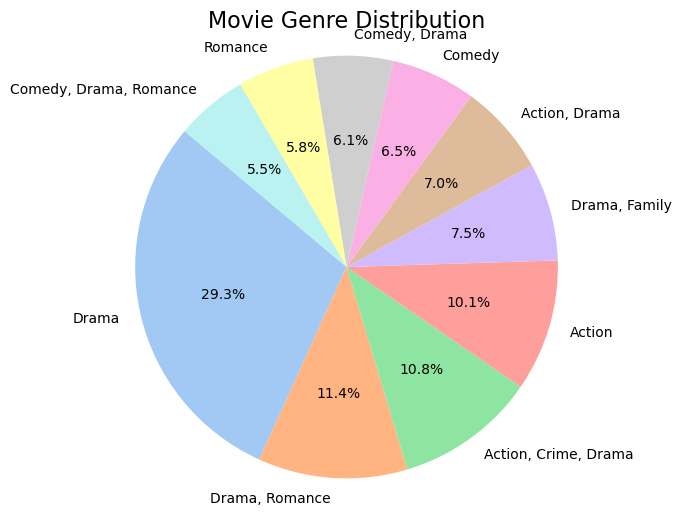

In [23]:
plt.figure(figsize=(6, 6))
plt.pie(top_n_genres['Count'], labels=top_n_genres['Genre'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Movie Genre Distribution', fontsize=16)
plt.axis('equal')
plt.show()

### Distribution of Top directors by average rating

In [24]:
# Group the data by director and calculate the average rating
director_avg_rating = df.groupby('Director')['Rating'].mean().reset_index()

director_avg_rating = director_avg_rating.sort_values(by='Rating', ascending=False)

top_directors = director_avg_rating.head(10)
top_directors

,Director,Rating
2243,Saif Ali Sayeed,10.0
2560,Sriram Raja,9.7
504,Bobby Kumar,9.6
322,Arvind Pratap,9.4
1513,Munni Pankaj,9.4
2598,Suhrud Godbole,9.4
1601,Nikhil Mahar,9.3
2809,Venkatesh Bk,9.3
1879,Rahul Mallick,9.3
1864,Raghav Jairath,9.3


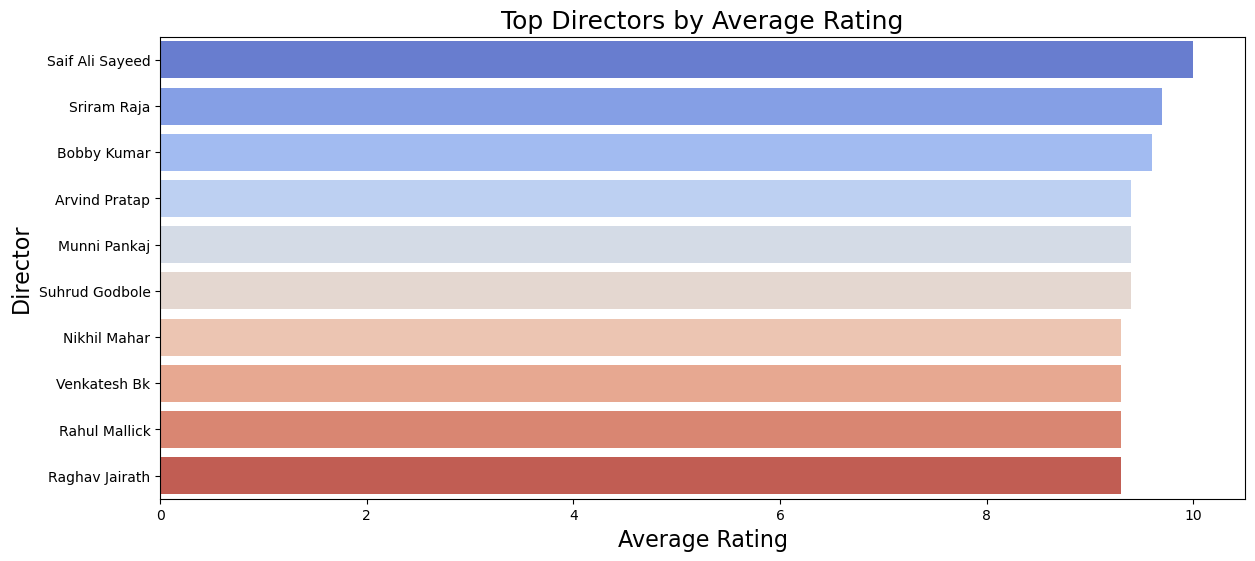

In [25]:
plt.figure(figsize=(14, 6))
sns.barplot(data=top_directors, x='Rating', y='Director', palette='coolwarm')

plt.title('Top Directors by Average Rating', fontsize=18)
plt.xlabel('Average Rating', fontsize=16)
plt.ylabel('Director', fontsize=16)

plt.show()

### Relationship between the number of votes and movie ratings

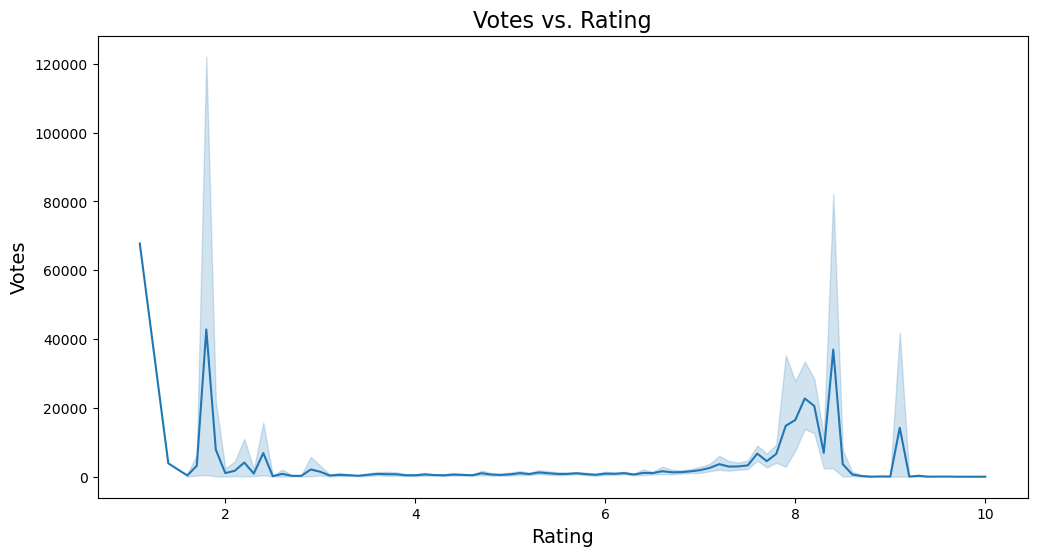

In [26]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Rating', y='Votes')

plt.title('Votes vs. Rating', fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Votes', fontsize=14)

plt.show()

### Distribution of top actors by number of movie

In [27]:

actor_counts = df['Actor 1'].value_counts().reset_index()
actor_counts.columns = ['Actor', 'MovieCount']

top_n_actors = actor_counts.head(10)
top_n_actors

,Actor,MovieCount
0,Jeetendra,140
1,Dharmendra,134
2,Mithun Chakraborty,130
3,Ashok Kumar,125
4,Rajesh Khanna,118
5,Amitabh Bachchan,116
6,Dev Anand,90
7,Shashi Kapoor,88
8,Akshay Kumar,82
9,Sanjay Dutt,73


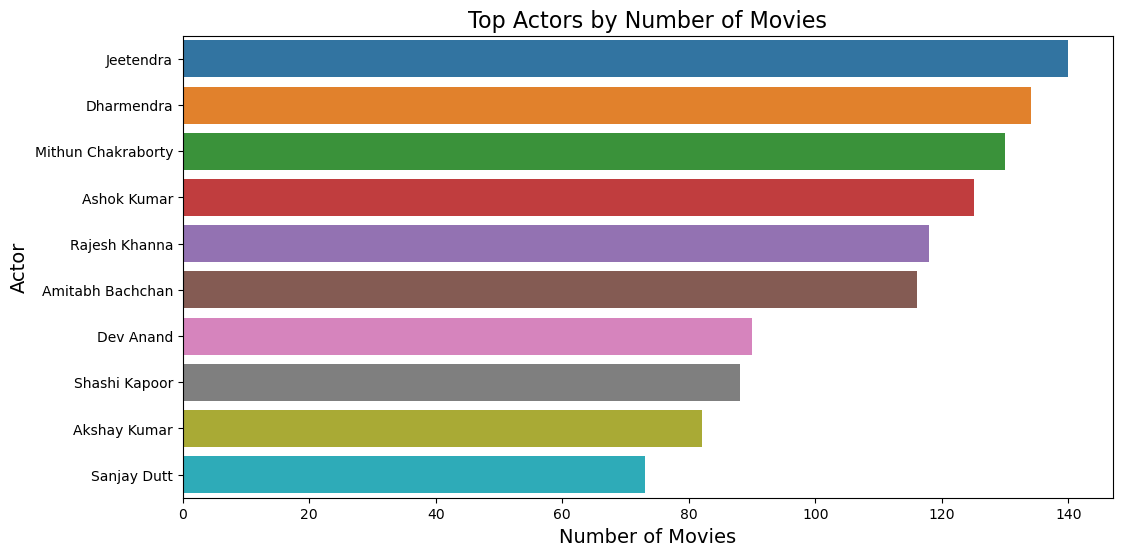

In [28]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_n_actors, x='MovieCount', y='Actor', orient='h')

# Set plot labels and title
plt.title('Top Actors by Number of Movies', fontsize=16)
plt.xlabel('Number of Movies', fontsize=14)
plt.ylabel('Actor', fontsize=14)

# Show the plot
plt.show()

### Distribution of number of movie released every year

In [29]:
yearly_movie_counts = df['Year'].value_counts().reset_index()
yearly_movie_counts.columns = ['Year', 'MovieCount']

yearly_movie_counts = yearly_movie_counts.sort_values(by='Year')
yearly_movie_counts

,Year,MovieCount
91,1917,1
88,1931,3
89,1932,2
86,1933,4
90,1934,2
...,...,...
1,2017,223
2,2018,214
0,2019,238
9,2020,157


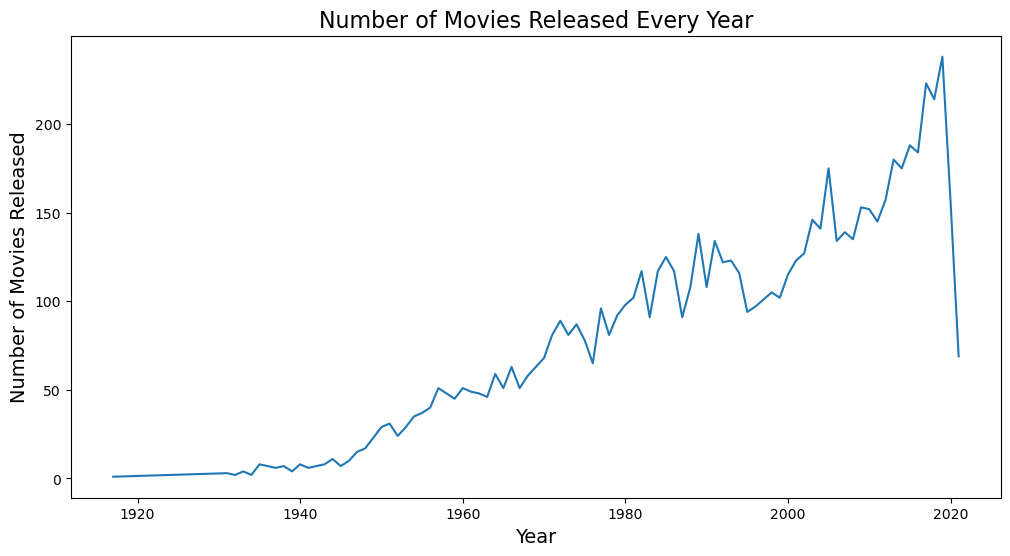

In [30]:

plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_movie_counts, x='Year', y='MovieCount')

plt.title('Number of Movies Released Every Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Movies Released', fontsize=14)

plt.show()

### Distribution of Movies with rating greater than 8 and votes greater than 10000

In [31]:
filtered_df = df[(df['Rating'] > 8) & (df['Votes'] > 10000)]
filtered_df =filtered_df.sort_values(by='Votes', ascending=False)
filtered_df.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
75,3 Idiots,2009,170,"Comedy, Drama",8.4,357889,Rajkumar Hirani,Aamir Khan,Madhavan,Mona Singh
8228,Like Stars on Earth,2007,165,"Drama, Family",8.4,175810,Aamir Khan,Amole Gupte,Darsheel Safary,Aamir Khan
10882,PK,2014,153,"Comedy, Drama, Musical",8.1,168150,Rajkumar Hirani,Aamir Khan,Anushka Sharma,Sanjay Dutt
3410,Dangal,2016,161,"Action, Biography, Drama",8.4,165074,Nitesh Tiwari,Aamir Khan,Sakshi Tanwar,Fatima Sana Shaikh
11725,Rang De Basanti,2006,167,"Comedy, Crime, Drama",8.1,114446,Rakeysh Omprakash Mehra,Aamir Khan,Soha Ali Khan,Siddharth
8035,Lagaan: Once Upon a Time in India,2001,224,"Drama, Musical, Sport",8.1,107234,Ashutosh Gowariker,Aamir Khan,Raghuvir Yadav,Gracy Singh
4902,Gangs of Wasseypur,2012,321,"Action, Comedy, Crime",8.2,86355,Anurag Kashyap,Manoj Bajpayee,Richa Chadha,Nawazuddin Siddiqui
13635,Swades,2004,189,Drama,8.2,85340,Ashutosh Gowariker,Shah Rukh Khan,Gayatri Joshi,Kishori Ballal
13384,Soorarai Pottru,2020,153,Drama,9.1,83029,Sudha Kongara,Suriya,Madhavan,Paresh Rawal
1019,Andhadhun,2018,139,"Crime, Drama, Music",8.2,77901,Sriram Raghavan,Ayushmann Khurrana,Tabu,Radhika Apte


In [32]:
filtered_df['Rating_s'] = df.Rating.apply(str)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7558 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      7558 non-null   object 
 1   Year      7558 non-null   int32  
 2   Duration  7558 non-null   object 
 3   Genre     7558 non-null   object 
 4   Rating    7558 non-null   float64
 5   Votes     7558 non-null   int32  
 6   Director  7558 non-null   object 
 7   Actor 1   7558 non-null   object 
 8   Actor 2   7558 non-null   object 
 9   Actor 3   7558 non-null   object 
dtypes: float64(1), int32(2), object(7)
memory usage: 848.5+ KB


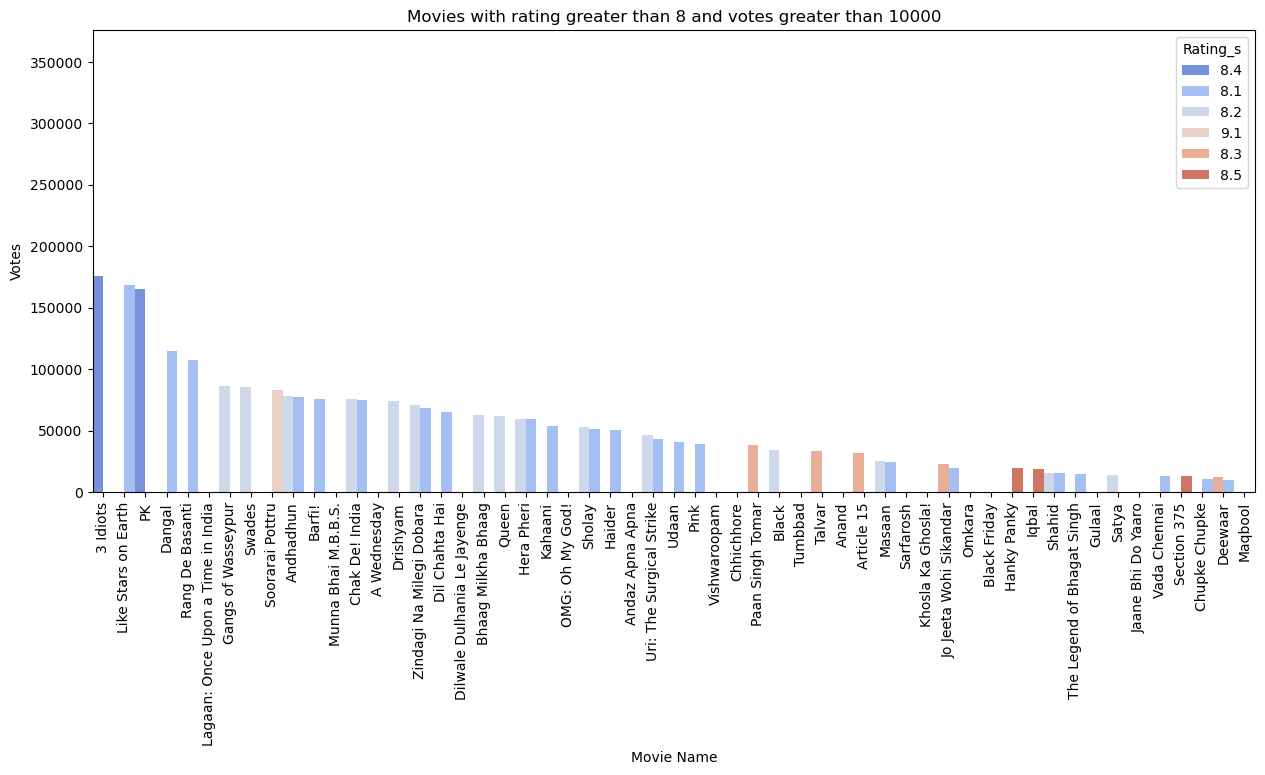

In [34]:
plt.figure(figsize=(15,6))
sns.barplot(data= filtered_df, x='Name',y='Votes', hue = 'Rating_s' , width=3,palette='coolwarm')
plt.xlabel('Movie Name')
plt.ylabel('Votes')
plt.title('Movies with rating greater than 8 and votes greater than 10000')
plt.xticks(rotation=90)

plt.show()

### Distribution of Number of movies each genre

In [35]:
df['Genre'] = df['Genre'].str.split(',')

# Create a new DataFrame with one row for each genre
genre_df = df.explode('Genre')
genre_df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,Comedy,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
3,#Yaaram,2019,110,Romance,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,Comedy,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,Drama,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,1988,135.0,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,1999,129,Action,4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15505,Zulmi,1999,129,Drama,4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15508,Zulm-O-Sitam,1998,130,Action,6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


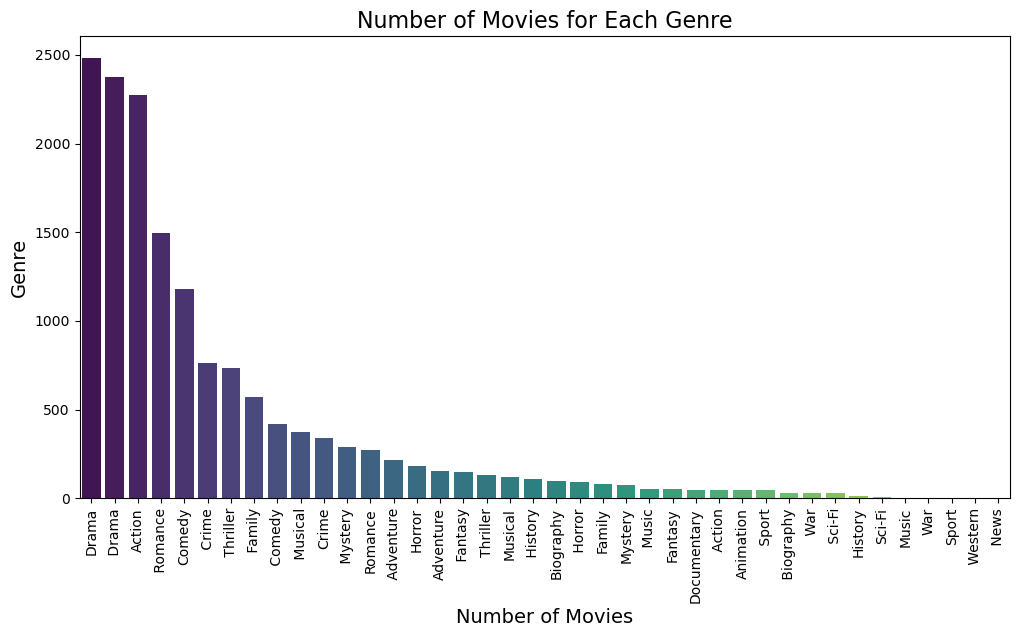

In [36]:
plt.figure(figsize=(12, 6))
sns.countplot(data=genre_df, x='Genre', order=genre_df['Genre'].value_counts().index , palette='viridis')

plt.title('Number of Movies for Each Genre', fontsize=16)
plt.xlabel('Number of Movies', fontsize=14)
plt.ylabel('Genre', fontsize=14)
plt.xticks(rotation=90)

plt.show()

### Distribution of Average rating of movies in each genre

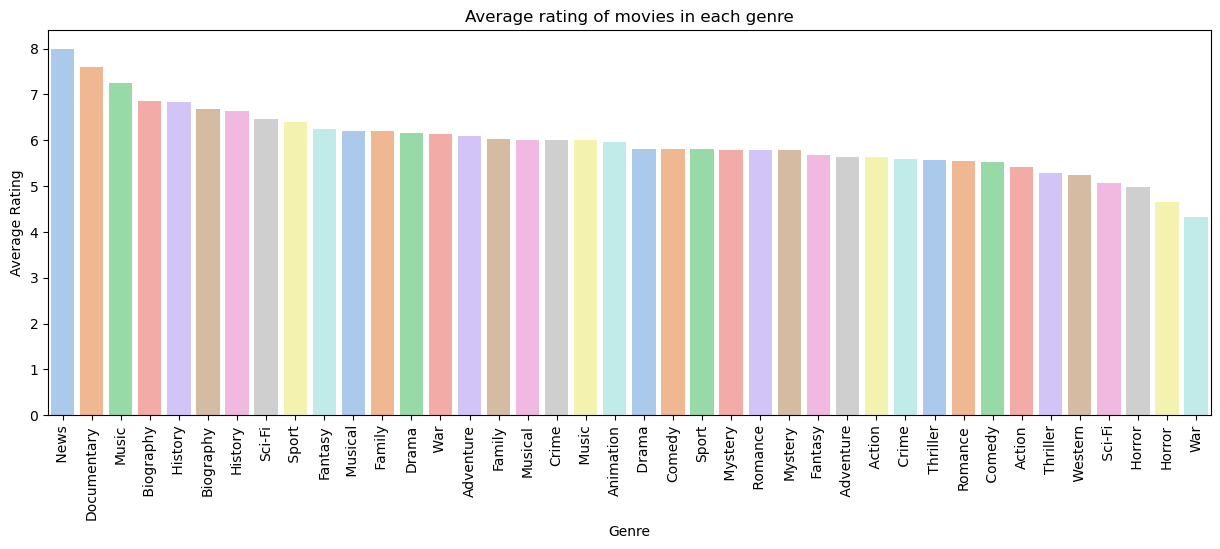

In [37]:
average_rating_by_genre = genre_df.groupby('Genre')['Rating'].mean().reset_index()
average_rating_by_genre = average_rating_by_genre.sort_values(by='Rating', ascending=False)
     

plt.figure(figsize=(15,5))
sns.barplot(data=average_rating_by_genre,y="Rating",x='Genre',palette='pastel')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.title('Average rating of movies in each genre')
plt.xticks(rotation=90)

plt.show()

## Featured Engineering

In [38]:

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

trans_data = df.drop(['Name'],axis=1)
# Transform Director columns
trans_data['Director'] = labelencoder.fit_transform(df['Director'])

# Transform Actors Columns
trans_data['Actor 1'] = labelencoder.fit_transform(df['Actor 1'])
trans_data['Actor 2'] = labelencoder.fit_transform(df['Actor 2'])
trans_data['Actor 3'] = labelencoder.fit_transform(df['Actor 3'])

trans_data['Genre'] = labelencoder.fit_transform(df['Genre'].apply(lambda x: ', '.join(x)))

trans_data.head()
     

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,2019,109,252,7.0,8,755,1686,2725,373
3,2019,110,205,4.4,35,1637,1500,865,2543
5,1997,147,175,4.7,827,1881,481,84,2422
6,2005,142,315,7.4,1086,2486,878,1346,2996
8,2012,82,351,5.6,326,161,2385,1416,1189


In [39]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
sc_data = scaler.fit_transform(trans_data)
sc_df = pd.DataFrame(sc_data,columns=trans_data.columns)

sc_df.head()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,0.980769,0.293333,0.607229,0.662921,0.000005,0.255499,0.698426,0.979511,0.123102
1,0.980769,0.296667,0.493976,0.370787,0.000051,0.553976,0.621375,0.310927,0.839274
2,0.769231,0.420000,0.421687,0.404494,0.001390,0.636548,0.199254,0.030194,0.799340
3,0.846154,0.403333,0.759036,0.707865,0.001828,0.841286,0.363712,0.483825,0.988779
4,0.913462,0.203333,0.845783,0.505618,0.000543,0.054484,0.987987,0.508986,0.392409


## Examine Correlation of Data

In [40]:
# correlation
corr_df = trans_data.corr(numeric_only=True)
corr_df['Rating'].sort_values(ascending=False)

Rating      1.000000
Votes       0.134655
Genre       0.122565
Actor 2     0.038852
Actor 3     0.031550
Actor 1     0.025089
Director   -0.003678
Year       -0.194990
Name: Rating, dtype: float64

<Axes: >

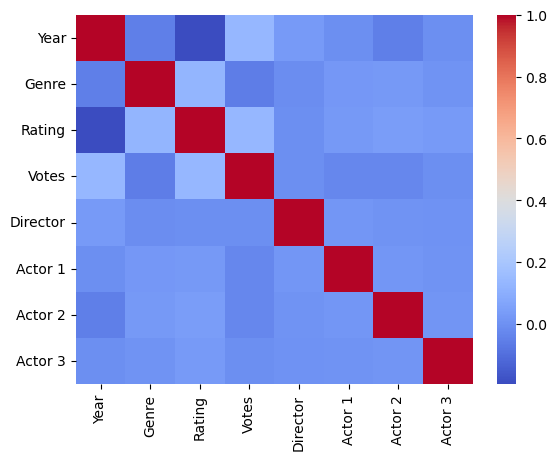

In [41]:

sns.heatmap(corr_df,annot=False,cmap="coolwarm")

#### Now our transformed columns are much correlated with the target variable so we are ready to go

### Model Building

In [42]:
# Import modeling Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
     

In [43]:

# put data except Rating data
X = trans_data.drop(['Rating'],axis=1)

# Put only Rating data
y = trans_data['Rating']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

##### In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. 
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.


In [44]:
X_test = np.array(X_test)
     

y_pred = model.predict(X_test)
y_pred


array([6.38173569, 6.27438422, 6.24148256, ..., 5.6990634 , 6.25823896,
       6.09526622])

In [45]:
print('R2 score: ',r2_score(y_test,y_pred))
print('Mean squared error: ',mean_squared_error(y_test,y_pred))
print('Mean absolute error: ',mean_absolute_error(y_test,y_pred))

R2 score:  0.08483347672034813
Mean squared error:  1.6972873264361998
Mean absolute error:  1.0286370452288052


In [46]:
print(y_test)

6241     7.4
3321     4.9
6117     6.5
5975     5.7
6653     7.0
        ... 
14566    3.5
10966    5.2
10168    2.7
14796    4.9
2785     8.0
Name: Rating, Length: 2268, dtype: float64
